## **The Sparks Foundation**
###  Data Science and Business Analytics

### Author: Abhishek Potdar

### Task 1 - Prediction using supervised ML
#### Dataset Link - http://bit.ly/w-data
Predict the percentage of an student based on the no. of study hours.

In [25]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [26]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

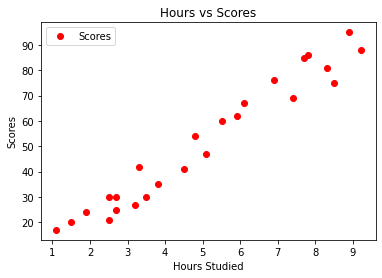

In [30]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',color='red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

### Preparing the data

In [31]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Simple Linear Regression model on the Training set

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [34]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [35]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualising the Regression line

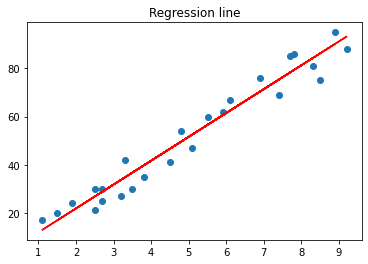

In [36]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y,marker='o')
plt.title('Regression line')
plt.plot(X, line,color='red');
plt.show()

### Predicting the scores by inputting the no. of hours

In [37]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Evaluating the model

In [38]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean squared error: ",mse)
print("Mean absolute error: ",mae)
print("Root mean squared error: ",rmse)

Mean squared error:  21.598769307217456
Mean absolute error:  4.183859899002982
Root mean squared error:  4.647447612100373
